In [1]:
import numpy as np
from nnAudio import Spectrogram
from librosa.core import note_to_hz
import torch

In [2]:
import matplotlib.pyplot as plt

# Creating artificial input signal

In [3]:
fs = 22050
s = np.linspace(0,10,fs*10)
x = np.sin(2*np.pi*50*s, dtype=np.float32) + np.sin(2*np.pi*100*s, dtype=np.float32) \
    + np.sin(2*np.pi*200*s, dtype=np.float32) + np.sin(2*np.pi*400*s, dtype=np.float32) \
    + np.sin(2*np.pi*800*s, dtype=np.float32) + np.sin(2*np.pi*1600*s, dtype=np.float32) \
    + np.sin(2*np.pi*3200*s, dtype=np.float32) + np.sin(2*np.pi*6400*s, dtype=np.float32) 

# nnAudio

In [4]:
mel_spectrogram = Spectrogram.MelSpectrogram()

STFT filter created, time used = 0.2204 seconds
Mel filter created, time used = 0.0035 seconds


In [5]:
melspec_torch = mel_spectrogram(torch.tensor(x))

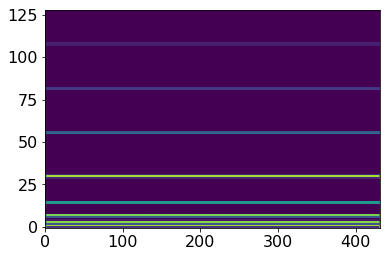

In [6]:
plt.imshow(melspec_torch[0].numpy(), aspect='auto', origin='lower')
plt.tick_params(labelsize=16)

# Librosa Implmentation

In [7]:
from librosa.feature import melspectrogram

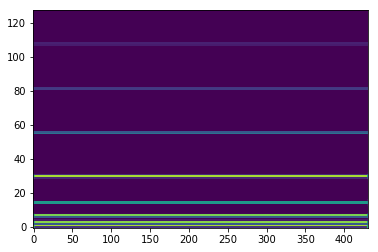

In [8]:
plt.imshow(melspectrogram(x), aspect='auto', origin='lower')

## Comparing nnAudio and Librosa output

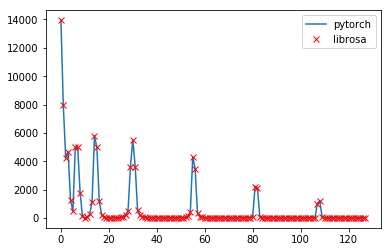

In [9]:
plt.plot(melspec_torch[0].numpy()[:,0])
plt.plot(melspectrogram(x)[:,0], 'rx')
plt.legend(['pytorch', 'librosa'])

In [10]:
np.allclose(melspec_torch[0].numpy()[:,0], melspectrogram(x)[:,0])

True